In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Download data

In [24]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

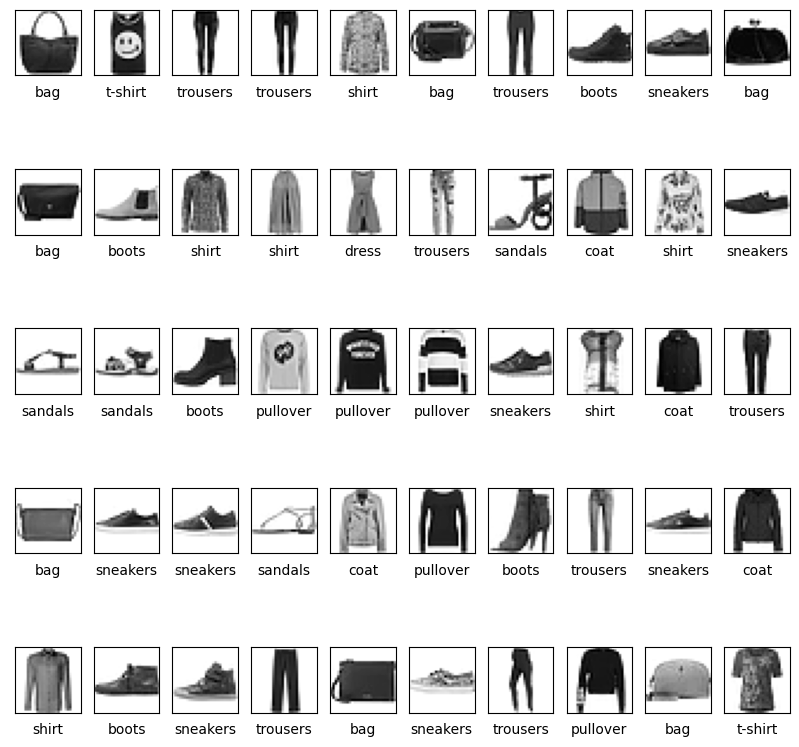

In [25]:
classes = ["t-shirt", "trousers", "pullover", "dress", "coat", "sandals", "shirt", "sneakers", "bag", "boots"]

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## Preparing the data

In [26]:
# the current shape is (60_000, 28, 28) - 60 000 images 28x28 pixels each
x_train = x_train.reshape(60_000, 784) 
# each pixel should be normalized: [0;255] => [0;1]
x_train = x_train / 255

In [27]:
# print(y_train[0]) # 9
y_train = utils.to_categorical(y_train, 10)
# print(y_train[0]) # [0,0,0,0,0,0,0,0,0,1]

## Making a NN architecture

In [64]:
model = Sequential() # each node of a layer of this model is connected with each node of the previous layer
model.add(Dense(900, input_dim=784, activation="relu"))
# model.add(Dense(7, activation="relu"))
# model.add(Dense(401, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 784 > 800 > 10            : params: 636,010 - loss: 0.0657 - accuracy: 0.9762
# 784 > 800 > 157 > 53 > 10 : params: 762,671 - loss: 0.0692 - accuracy: 0.9737
# 784 > 800 > 53 > 413 > 10 : params: 696,895 - loss: 0.0704 - accuracy: 0.9727
# 784 > 800 >  7 >  43 > 10 : params: 634,391 - loss: 0.0849 - accuracy: 0.9700
# 784 > 800 >  7 > 401 > 10 : params: 640,835 - loss: 0.0835 - accuracy: 0.9688
# 784 > 900 > 10            : params: 715,510

In [65]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary()) # Total params: 636,010

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 900)               706500    
                                                                 
 dense_38 (Dense)            (None, 10)                9010      
                                                                 
Total params: 715,510
Trainable params: 715,510
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [66]:
model.fit(x_train, y_train, 
          batch_size=200, 
          epochs=50,  
          verbose=1)

Epoch 1/50
300/300 [==============================] - 4s 10ms/step - loss: 0.5048 - accuracy: 0.8238
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.3756 - accuracy: 0.8664
Epoch 3/50
300/300 [==============================] - 3s 10ms/step - loss: 0.3333 - accuracy: 0.8799
Epoch 4/50
300/300 [==============================] - 3s 10ms/step - loss: 0.3056 - accuracy: 0.8897
Epoch 5/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2857 - accuracy: 0.8956
Epoch 6/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2686 - accuracy: 0.9016
Epoch 7/50
300/300 [==============================] - 3s 12ms/step - loss: 0.2598 - accuracy: 0.9035
Epoch 8/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2452 - accuracy: 0.9091
Epoch 9/50
300/300 [==============================] - 3s 9ms/step - loss: 0.2356 - accuracy: 0.9141
Epoch 10/50
300/300 [==============================] - 4s 12ms/step - loss: 0.2231 - accurac

## Usage

In [35]:
predictions = model.predict(x_train)


1875/1875 [==============================] - 4s 2ms/step


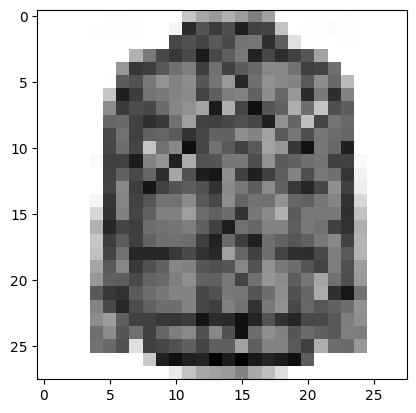

[4.2497897e-05 4.7993791e-09 6.0323342e-03 1.4769202e-05 7.7477396e-01
 3.3774949e-12 2.1913496e-01 5.0660543e-12 1.5082279e-06 4.3499743e-10]


'coat'

In [38]:
n = 32
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(predictions[n])
classes[np.argmax(predictions[n])]